# Finding Communities of Scholars On Twitter

### created by Elliot Frank, MITH Intern 3.31.17

Hello! This is the second in a planned series of tutorials that use the Twarc tool from the Documenting the Now project in order to faciliate research on Twitter. The point of this tutorial is an introduction to analyzing communities on Twitter using network analysis. Our task is to create an automatic way to, given a single Twitter user, find the most important people in their social network.

In [1]:
# First thing to do is to simply insert our credentials and start up a Twarc object. 
# You might remember this from last tutorial.

from twarc import Twarc
import pandas as pd
import numpy as np



t = Twarc()



We're going to use Ed Summers' Twitter account as an example! Ed is lead developer at MITH and the creator of the Twarc app. Most importantly, we can quiz him about his followers to see if our suspicions were right.

This tutorial is going to be divided into two parts. The first is getting Ed's community of friends. This task will let us practice two skills: using Twarc to get information from Twitter, and using Networkx to create a network of Ed's followers.

# Collecting Communities

Like we said, the input to our script is going to be a single username, in this case Ed's username (@edsu). The first thing we'll do is get all of Ed's information. If you manually change the "seed_screenname" parameter, this whole tutorial should still get the network for that person.

In [2]:
seed_screenname = 'edsu'   #Here we key in Ed's screenname. This is the only input.

for user in t.user_lookup(screen_names=[seed_screenname]):     # These two lines actually collect all the information 
    seed_user = user                                           # from Ed's account
    
# Let's print Ed's screennme, id, and description
print(seed_user['name'],'follows',seed_user['friends_count'],'accounts and has',seed_user['followers_count'],'followers')

Ed Summers follows 2712 accounts and has 4706 followers


Now we have Ed's information, let start finding his friends. Our network will be composed of every person that Ed follows who follows him back. We're going to call these people "mutual follows". To get this group of people, we're going to separately find the id's of all his followers, and the people he follows, and then find all the id's that appear in both lists.

In [3]:
friends_list = []
followers_list = []

for friend in t.friend_ids(seed_user['screen_name']):
    friends_list.append(str(friend))

for follower in  t.follower_ids(seed_user['screen_name']):
    followers_list.append(str(follower))

print('Just to check our work, we found',len(friends_list),'people that',seed_user['name'],
      'follows and',len(followers_list),'followers. This should match the numbers we found before')

Just to check our work, we found 2712 people that Ed Summers follows and 4706 followers. This should match the numbers we found before


Now we want to find the mutual relationships Ed has: people who he follows and who follow him. This should pare down those numbers some and help us filter out unimportant relationships.

In [16]:
# We write a simple function to find the intersection of two lists.
def intersection(x,y):
    return list(set(x) & set(y))


mutuals = intersection(friends_list,followers_list)
print('There are',len(mutuals),'mutual followers of Ed')


There are 1112 mutual followers of Ed


Great! Now we have about half the number of accounts we're interested in. The number is still alot though, and if we were interested in finding other people with similar jobs to Ed, we would still need to sift through over 1000 accounts. Now we'll look at filling out the network of these followers. That is, we're going to repeat this process of finding mutual followers for every follower we've found already. First, let's look at this list we called "mutuals".

In [17]:
mutuals

['80706273',
 '8653692',
 '15077314',
 '285395514',
 '2460112424',
 '897811',
 '104894644',
 '92381471',
 '605674944',
 '14444911',
 '1012488631',
 '1864218420',
 '14755464',
 '24075855',
 '1281581',
 '7351742',
 '3070157379',
 '21520623',
 '4800615289',
 '181340048',
 '14068465',
 '9336402',
 '778705536',
 '318432471',
 '9885312',
 '17417376',
 '91438333',
 '39108132',
 '26282436',
 '11723252',
 '41418156',
 '213793319',
 '337124515',
 '386814685',
 '5345122',
 '128136694',
 '7841792',
 '110866131',
 '752673',
 '146645515',
 '27699583',
 '22075295',
 '56463905',
 '269860126',
 '2416252063',
 '230028869',
 '2450008915',
 '2286342103',
 '761586616393576449',
 '14585572',
 '23221312',
 '1547722903',
 '14365001',
 '69682678',
 '14513488',
 '17904404',
 '16016618',
 '17066195',
 '17981917',
 '6758652',
 '695043',
 '48382538',
 '126104034',
 '9148432',
 '88639326',
 '13145012',
 '898691',
 '127524178',
 '823621',
 '13094262',
 '495430242',
 '15726951',
 '22790425',
 '18644186',
 '15762276',

As we can see, it's a list of id's. These are good for looking up friends but we might find it easier if we had actual names. We can look that up the same way we looked up Ed's information. Also, here we're going to filter out protected users, because when we look up their followers later it will give us an error.

In [18]:
network_dictionary = {}
for user in t.user_lookup(user_ids = mutuals):
    if user['protected'] == False:
        network_dictionary[user['id_str']] = user['name']
print(network_dictionary)

{'80706273': 'Desiree P. Jones', '8653692': 'Nate Hill', '15077314': 'Michael Peter Edson', '285395514': 'Melanie Walsh', '2460112424': 'Jaime Mears', '897811': 'Peter Brantley', '104894644': 'Shawn Graham', '92381471': 'Jim Clifford', '605674944': 'Dean Farrell', '631612287': 'Jonathon Keats', '14444911': 'Alastair Dunning', '1012488631': 'Bergis Jules', '1864218420': 'indiemarvin', '14755464': 'Yves Raimond', '24075855': 'Roopika Risam', '1281581': 'David Riordan🖖', '4800615289': 'Melissa B', '181340048': 'Sigrid Cordell', '14068465': 'Bess Sadler', '9336402': 'Vernon Reid', '778705536': 'Wesley Hogan', '318432471': 'Dianne Dietrich', '9885312': 'Ryan Scherle', '323658480': 'Gloria Gonzalez 🌹', '17417376': '🔥 Maureen 🔥', '91438333': 'Alex Gil', '16057909': 'rachel mattson', '26282436': 'Makiba', '11723252': 'epiraces', '41418156': 'Lauren Sorensen', '337124515': 'Martin Klein', '128136694': 'Laurie Spiegel', '5345122': 'Logan', '7841792': 'Steve McLaughlin', '110866131': 'LocalWiki',

Now we're going to start working on the network we were talking about before. A network is like a web that shows the social relations between people. It has two main features: nodes and edges. In our case, a node is a user in our list of mutual followers, and an edge represents that those people both follow each-other.

In [106]:
import networkx as nx
G = nx.Graph()
G.add_node(seed_user['name'])
for user in network_dictionary.values():
    G.add_node(user)
    G.add_edge(seed_user['name'],user)
print(G.nodes())

['Alexandre Monnin', 'James M Snell', 'Ganaele Langlois', 'Peter Viechnicki', 'Christopher Burns', 'Evan Sandhaus', 'Uldis Bojars', 'Martin Paul Eve', 'TheFutureChronicles', 'Jessica Ogden', 'Matthew Lavin', 'Scott Pennington', 'Richard Light', 'Brian Tingle', 'Natalie M. Houston', 'Tanya Lokot', 'ok', 'Duncan Friend', '(((sfn)))🇪🇺', 'Jeremy Singer-Vine', 'Metadata_Maven', 'justinsimpson', 'Leah WeinrybGrohsgal', 'Dene Grigar', 'Anne Ladyem McDivitt', 'I am who am Bill', 'tara robertson', 'Samuel Woolley', 'Meg Young', 'Kees Teszelszky', 'Simon St.Laurent', 'Rosalyn Metz', 'Denise D. Meringolo', 'Fiona', 'Donal Heidenblad', 'John Summers', 'Melissa B', 'Chris Wilper', 'Brian Vargas', 'Makiba', 'UWDigitalHumanities', 'Alberto Accomazzi', 'Thomas Padilla', 'Margaret Janz', 'UVic DHum', 'Jaime Mears', 'Peter Kiraly', 'Walter McGinnis', 'Helen Hockx-Yu', 'Your Favorite Asian', 'Wikimedia DC', 'Ben Bromley', 'Kate Theimer', 'Tom Mullaney', 'Purdom Lindblad', 'John Kunze', 'Ely Wallis', 'Jef

/Users/elliotgoldingfrank/anaconda/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning:

pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.

/Users/elliotgoldingfrank/anaconda/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning:

pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.

/Users/elliotgoldingfrank/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:917: UserWarning:

axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.

/Users/elliotgoldingfrank/anaconda/lib/python3.5/site-packages/matplotlib/rcsetup.py:152: UserWarning:

axes.hold is deprecated, will be removed in 3.0



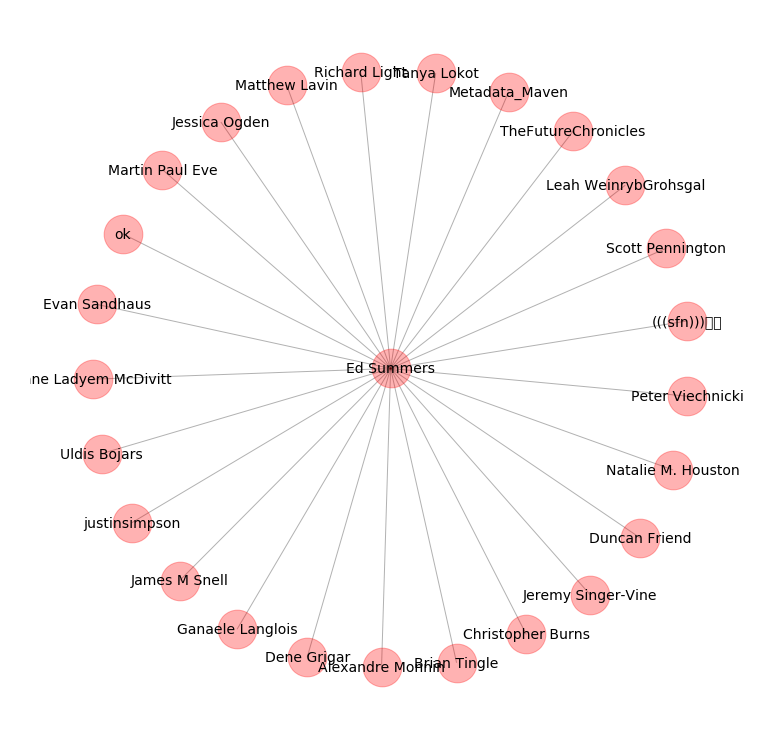

In [134]:
import matplotlib.pyplot as plt
plt.close('all')

# Get subgraph 
sub_G = G.nodes()[0:25]                       # Take 25 nodes from the graph
if seed_user['name'] not in sub_G:    # Make sure Ed's account is in the subgraph
    sub_G.append(seed_user['name'])    
    
sub_G = G.subgraph(sub_G)                     # This actually creates the subgraph, ie takes the nodes we give it
                                               # and fills in the edges



pos = nx.spring_layout(sub_G,scale=.9,k=.3)
options = {'node_size':1500, 'node_color':'r', 'with_labels':True, 'alpha':0.3, 'font_size':14}

plt.figure(1,figsize=(10,10))


ax = plt.axes([0,0,2,1])
ax.set_axis_off()
ax.set_aspect('equal')
nx.draw(sub_G,pos,ax=ax,**options)


plt.show()


We're going to visualize a small part of this network (called a subgraph) that contains Ed's node as well as 25 other nodes. Try to guess what it's going to look like before we draw it!

Did you guess that it would look like a wheel? The entire network looks just like this but with a lot more nodes. At this point, we want to fill out the network by finding the mutual followers of every one of those mutual followers. In other words, now we're going to look at all those nodes that are connected to Ed, and find the connections between each one of them amongst each other.

### A word of warning: this step will take several hours! 
Because of Twitter's limits for finding followers and friends, this step is going to take a while. If you're running your own network, the best thing to do is leave your computer running overnight. But if you're using Ed's account as an example, you can find the output file 'edsu.adjlist' is already in the Github. This file is called an adjacency list, but basically it's a compact way to store the information about the nodes and edges. So, you can skip this next cell and move on to where we read in the data and do analysis on it.

In [9]:
for user_A_name in network_dictionary.values():
    
    # First we need to look up all the people the user follows
    user_A_friends = [] 
    for friend in t.friend_ids(user_A_name):
        user_A_friends.append(friend)
    print(len(user_A_friends))
    # Then we find how many of users are currently in our network.
    mutual_fof = intersection(user_A_friends,network_dictionary.keys())   # Now we have a list of mutual ids
    print(user_A_name,'has',len(mutual_fof),'connections')
    # Then we're going to add edges between each of those users in the network.
    for user_B_id in mutual_fof:
        user_B_name = network_dictionary[user_B_id]      # We have their id and want to look up their name.
        G.add_edge(user_A_name,user_B_name)

        
nx.write_adjlist(G,'edsu.adjlist')


69
Ward Cunningham has 2 connections
69
Eric Hellman has 2 connections
69
Open GLAM has 2 connections
69
Jeffrey Moro has 2 connections
69
John Weise has 2 connections
69
Kevin Winstead has 2 connections
69
David Riordan🖖 has 2 connections
69
Scott Enderle has 2 connections
69
Karim B Boughida has 2 connections
69
Mark Custer has 2 connections
69
Jeremy Wiebe has 2 connections
69
Karl Grossner has 2 connections
69
Bahareh R. Heravi has 2 connections


69
megan squire has 2 connections
69
Chris Freeland has 2 connections
69
var = me has 2 connections
69
Ed Benoit III has 2 connections
69
Andrew Weber has 2 connections
69
Joseph Mosconi has 2 connections
69
The Paris Review has 2 connections
69
Denise D. Meringolo has 2 connections
69
Shawn Walker has 2 connections
69
Damara Arrowood has 2 connections
69
Alexandre Turgeon has 2 connections
2882
HathiTrust has 169 connections
69
virtual peripatetic has 2 connections
1802
Stevie has 0 connections


780
un_archives has 45 connections
69
John Summers has 2 connections
69
Simon St.Laurent has 2 connections
651
dlovins has 74 connections
69
Sarah Simpkin has 2 connections
260
tanyaclement has 75 connections
69
Tom Mullaney has 2 connections
69
Hugo Estrada has 2 connections
69
Jon Voss has 2 connections
69
Carol Stabile has 2 connections
69
Jefferson Bailey has 2 connections
69
Web@rchive Austria has 2 connections
69
Delphine Ménard ≈ has 2 connections
69
Digital New Zealand has 2 connections
69
Matthew Oliver has 2 connections
1940
LocalWiki has 43 connections


69
DeWitt Clinton has 2 connections
69
Brandon Locke has 2 connections
69
Adam Rabinowitz has 2 connections
69
Richard Marciano has 2 connections
69
Vernon Mitchell, Jr. has 2 connections
69
Maryland's iSchool has 2 connections
69
Arfon Smith 🚀 has 2 connections
69
Gregory Jansen has 2 connections
69
Jean Bauer has 2 connections
69
Walmir Jr - Pythonix has 2 connections
69
tor sparql queen has 2 connections
69
Theresa Cullen has 2 connections
69
DH Summer Institute has 2 connections
69
Tristan Ferne has 2 connections
674
UMD_MITH has 110 connections


69
Brian Dietz has 2 connections
69
rachel mattson has 2 connections
69
Lily Pregill has 2 connections
69
Pete's Tweets has 2 connections
69
Mike Giarlo has 2 connections
69
Time-based Media™ has 2 connections
69
melissa terras has 2 connections
69
Scott Reed has 2 connections
69
Norman Walsh has 2 connections
69
tara robertson has 2 connections
69
jennifer waxman has 2 connections
69
Web Archive History has 2 connections
69
образец реальности has 2 connections
69
Aitor García Rey has 2 connections


69
Mike Amundsen has 2 connections
69
Gerhard Gossen has 2 connections
1060
jasonrhody has 154 connections
69
Ó Fathaigh has 2 connections
69
Andromeda Yelton has 2 connections
69
Mary Mark Ockerbloom has 2 connections
69
Erik Zachte has 2 connections
69
Setsuko Yokoyama has 2 connections
69
Dario Taraborelli has 2 connections
69
Sean Hannan has 2 connections
69
Emily Maemura has 2 connections
69
Mylène Bélanger has 2 connections
69
Arunesh Mathur has 2 connections
69
Pia Waugh has 2 connections
69
Internet Archive has 2 connections
69
Bergis Jules has 2 connections
69
Chris Bourg has 2 connections


69
Dave Rice has 2 connections
69
Thomas Padilla has 2 connections
435
ARCOMEM has 70 connections
69
Mike English has 2 connections
69
TI/A Initiative has 2 connections
69
Nicholas Woodward has 2 connections
69
Jamie A. Lee has 2 connections
69
Matthew Martin has 2 connections
69
Randy Olson has 2 connections
69
Michael L. Nelson has 2 connections
69
Jimmy Lin has 2 connections
69
R M Livingstone has 2 connections
69
Hector Correa has 2 connections
69
Audrey Watters has 2 connections


69
Brian Croxall has 2 connections
69
Doug Schepers has 2 connections
69
Jennifer Serventi has 2 connections
69
Anna Lauren Hoffmann has 2 connections
1654
SocArXiv has 45 connections
69
Walter McGinnis has 2 connections
69
Kat Moody has 2 connections
69
Andy Jackson has 2 connections
69
Micha Broadnax has 2 connections
69
Hilary Louise has 2 connections
69
Michael Peter Edson has 2 connections
3
ACH has 0 connections
69
DC Legal Hackers has 2 connections
69
Purdom Lindblad has 2 connections


69
Mita Williams has 2 connections
69
Jonathan Zittrain has 2 connections
260
cyberRodent has 1 connections
5317
roamin has 9 connections
69
Nathaniel V. KELSO has 2 connections
69
Joe Carrano has 2 connections
69
Rick Prelinger has 2 connections
69
Steph Ceraso has 2 connections
69
James Turk has 2 connections
69
Lainna Fader has 2 connections


HTTPError: 404 Client Error: Not Found for url: https://api.twitter.com/1.1/friends/ids.json?screen_name=DocumentingTheNow&cursor=-1

In [91]:
nx.graph_clique_number(G)

2

In [92]:
H = nx.read_adjlist('edsu.adjlist')

FileNotFoundError: [Errno 2] No such file or directory: 'edsu.adjlist'

In [ ]:
import json
mentions = []
addresses = [] 
for tweet in t.timeline(user_id=seed_user.id_str):
    if tweet['in_reply_to_user_id_str']:
        addresses.append(tweet['in_reply_to_user_id_str'])
    mentions += tweet['entities']['user_mentions']

# Add those as edges
for user in mentions:
    if user['id_str'] in mutuals:
        G.add_edge(seed_user.id_str,user['id_str'])


In [ ]:
# Repeat for every user in the graph

for user_A in G.nodes():
    mentions = []
    for tweet in t.timeline(user_A):
        mentions += tweet['entities']['user_mentions']
    for user_B in mentions:
        if user_B['id_str'] in mutuals:
            G.add_edge(user_A,user_B['id_str'])


In [ ]:
columns = ['id_str','name','description','screen_name','followers_count','friends_count','lang','protected']

mutual_names = t.user_lookup(user_ids= mutuals)

for user in mutual_names:
    row = []
    for label in columns:
        row.append(user[label])
    mutuals_df.append(row)
    if user['protected'] == False:
        G.add_node(user['id_str'])
        G.add_edge(seed_user['id_str'],user['id_str'])

In [ ]:
# Thinking about tuning parameters ! ! ! ! ! !!! ! ! ! ! !!! ! !!! !! ! ! !! ! ! ! ! !

In [ ]:
# Graph that! (oooh) 
import matplotlib.pyplot as plt


#H.remove_node(seed_user['id_str'])
print(H.edges())
pos=nx.spring_layout(H)

nx.draw_networkx_edges(H,pos)
nx.draw_networkx_nodes(H,pos)
'''
labels = {}
for node in H.nodes():
    if node in list(mutuals_df.index):
        labels[node] =  mutuals_df.loc[node,'name']


#nx.draw_networkx_labels(G,pos,labels,font_size=14)
'''
plt.axis('off')

plt.show()

In [ ]:
# Now, add the original id to the list to get a whole universe of potential recommendations, which we will pare down
master_list = friends_list + [int(seed_user.id_str)]


In [ ]:
# Helper to print names from an id
def print_names(ids):
    for id_0 in ids:
        print(api.get_user(id_0).screen_name)
# Helper to get a list of names from an id:
def get_names(ids):
    name_list = []
    for id_0 in ids:
        name_list.append(api.get_user(id_0).screen_name)
    return name_list
